Gradiente Descendente Estocástico para Clasificación
====

* Ultima modificación: 2023-03-11 | [YouTube](https://www.youtube.com/watch?v=l2iJAORWxHQ&list=PLEFpZ3YehTnCE1KFgZ4Ru1P9MMLElppNw&index=2)

* En un modelo de regresión, la variable dependiente $y$ es una función lineal de las variables independientes $x_i$, tal que:
$$
f(x)= b + w^T x
$$
donde: 

    * $x$ es un patrón o ejemplo del dataset.

    * $b$ es el intercepto del modelo.

    * $w$ son los coeficientes de las variales independientes.


* Para el caso de clasificación, se asume que el dataset esta formado por los ejemplos $(x_1, y_1), \cdots, (x_n, y_n)$, donde cada $x_i$ es un vector $m$ dimensional y $y \in \{-1, +1 \}$.

* Para determinar la clase, se aplica la función $\text{sign}(u)$ con $u = b + w^T x$.

* La estimación de parámetros se realiza utilizando el algoritmo de gradiente descendente estocástico, actualizando los parámetros del modelo a medida que va recorriendo los ejemplos (patrón de entrenamiento).

$$
w \leftarrow w - \eta 
\left[
\alpha \frac{\partial R(w)}{\partial w} +
\frac{\partial L(w^Tx_i + b_i, y_i)}{\partial w}
\right]
$$



* Función de pérdida L():

    * `hinge`: 

    $$
    L\left(y, f(x_i) \right) = 
    \max (0, 1 -  y_i f(x_i))
    $$ 

    * `squared hinge`: 

    $$
    L\left(y, f(x_i) \right) = 
    [\max (0, 1 -  y_i f(x_i)]^2
    $$ 
    
    * `perceptron`: 

    $$
    L\left(y, f(x_i) \right) = 
    \max (0, -y_i f(x_i))
    $$     
    
    * `modified_huber`: 

    $$L\left(y, f(x_i) \right) = 
    \begin{cases}
    \max(0, 1 - y_i f(x_i))^2 & \text{Si } y_i f(x_i) \gt 1 \\
    \\
    -4 y_i f(x_i) & \text{en cualquier otro caso}
    \end{cases}
    $$ 
    
    * `log`: logistica

    $$
    L\left(y, f(x_i) \right) = 
    \log \left(1 + \exp(- y f(x_i)) \right)
    $$
    
    * Least-squares:

    $$
    L\left(y, f(x_i) \right) = 
    \frac{1}{2} [y_i - f(x_i)]^2
    $$
    
    * `huber`: 
    
    $$
    L(d, y)=
      \begin{cases}
          \frac{1}{2}[d - y]^2 & \text{Si } |d-y| \le \epsilon \\
          \\
          \epsilon |d-y|-\frac{1}{2}\epsilon^2 & \text{en cualquier otro caso}
          \end{cases}
    $$     
    
    * Cualquiera de las funciones usadas con `SGDRegressor`.

* $R(w)$ es el término de regularización, el cual puede ser especificado como:

    * L2:

    $$
    R(w) = \frac{1}{2} \sum_j w_j^2
    $$

    * L1:

    $$
    R(w) = \frac{1}{2} \sum_j |w_j|
    $$

    * ElasticNet:

    $$
    R(w) = \frac{\rho}{2}  \sum_j w_j^2 + (1 - \rho)  \sum_j |w_j|
    $$


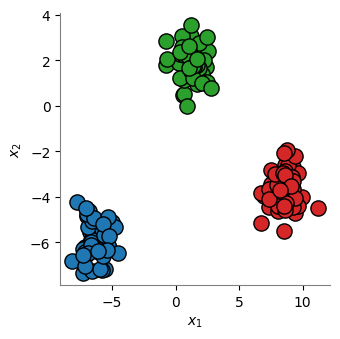

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

NPOINTS = 150

X, y = make_blobs(
    n_samples=NPOINTS,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    shuffle=False,
    random_state=12345,
)


def plot_scatter():
    plt.scatter(X[:50, 0], X[:50, 1], color="tab:red", edgecolors="k", s=120)
    plt.scatter(X[50:100, 0], X[50:100, 1], color="tab:blue", edgecolors="k", s=120)
    plt.scatter(X[100:, 0], X[100:, 1], color="tab:green", edgecolors="k", s=120)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.tight_layout()


plt.figure(figsize=(3.5, 3.5))
plot_scatter()
plt.show()

In [2]:
from sklearn.linear_model import SGDClassifier

sgdClassifier = SGDClassifier(
    # --------------------------------------------------------------------------
    # The loss function to be used.
    # * ‘hinge’ gives a linear SVM.
    # * ‘log_loss’ gives logistic regression, a probabilistic classifier.
    # * ‘modified_huber’ is another smooth loss that brings tolerance to 
    #   outliers as well as probability estimates.
    # * ‘squared_hinge’ is like hinge but is quadratically penalized.
    # * ‘perceptron’ is the linear loss used by the perceptron algorithm.
    # * The other losses, ‘squared_error’, ‘huber’, ‘epsilon_insensitive’
    #   and ‘squared_epsilon_insensitive’ are designed for regression but can be
    #   useful in classification as well;
    loss='hinge',
    # --------------------------------------------------------------------------
    # The penalty (aka regularization term) to be used. 
    # * None
    # * 'l2'
    # * 'l1'
    # * 'elasticnet'
    penalty='l2',
    # --------------------------------------------------------------------------
    # Constant that multiplies the regularization term. The higher the value, 
    # the stronger the regularization. Also used to compute the learning rate 
    # when set to learning_rate is set to ‘optimal’. Values must be in the 
    # range [0.0, inf).
    alpha=0.0001,
    # --------------------------------------------------------------------------
    # The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 
    # corresponds to L2 penalty, l1_ratio=1 to L1. Only used if penalty is 
    # ‘elasticnet’. Values must be in the range [0.0, 1.0].
    l1_ratio=0.15,
    # --------------------------------------------------------------------------
    # Whether to fit the intercept for this model.
    fit_intercept=True,
    # --------------------------------------------------------------------------
    # The maximum number of passes over the training data (aka epochs).
    max_iter=1000,
    # --------------------------------------------------------------------------
    # The stopping criterion.
    tol=1e-3,
    # --------------------------------------------------------------------------
    # Whether or not the training data should be shuffled after each epoch.
    shuffle=True,
    # --------------------------------------------------------------------------
    # * Epsilon in the epsilon-insensitive loss functions; only if loss is 
    #   ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’. 
    # * For ‘huber’, determines the threshold at which it becomes less important
    #   to get the prediction exactly right. 
    # * For epsilon-insensitive, any differences between the current prediction 
    #   and the correct label are ignored if they are less than this threshold. 
    # Values must be in the range [0.0, inf).
    epsilon=0.1,
    # --------------------------------------------------------------------------
    # Used for shuffling the data, when shuffle is set to True.
    random_state=None,
    # --------------------------------------------------------------------------
    # The learning rate schedule:
    # * ‘constant’: eta = eta0
    # * ‘optimal’: eta = 1.0 / (alpha * (t + t0)) 
    # * ‘invscaling’: eta = eta0 / pow(t, power_t)
    # * ‘adaptive’
    learning_rate='optimal',
    # --------------------------------------------------------------------------
    # The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ 
    # schedules. The default value is 0.0 as eta0 is not used by the default 
    # schedule ‘optimal’. Values must be in the range (0.0, inf).
    eta0=0.0,
    # --------------------------------------------------------------------------
    # The exponent for inverse scaling learning rate 
    power_t=0.5,
    # --------------------------------------------------------------------------
    # Whether to use early stopping to terminate training when validation score
    # is not improving.
    early_stopping=False,
    # --------------------------------------------------------------------------
    # The proportion of training data to set aside as validation set for early
    # stopping. Must be between 0 and 1. Only used if early_stopping is True.
    validation_fraction=0.1,
    # --------------------------------------------------------------------------
    # Number of iterations with no improvement to wait before stopping fitting.
    n_iter_no_change=5,
    # ---------------------------------------------------------------------
    # Weights associated with classes in the form {class_label: weight}
    class_weight=None,
    # --------------------------------------------------------------------------
    # When set to True, reuse the solution of the previous call to fit as 
    # initialization, otherwise, just erase the previous solution.
    warm_start=False,
    # --------------------------------------------------------------------------
    # When set to True, computes the averaged SGD weights across all updates 
    # and stores the result in the coef_ attribute. If set to an int greater 
    # than 1, averaging will begin once the total number of samples seen 
    # reaches average. So average=10 will begin averaging after seeing 10 
    # samples.
    average=False,   
)

sgdClassifier.fit(X, y)

sgdClassifier.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
sgdClassifier.coef_

array([[ 24.96547041,  -4.74132087],
       [-28.86896993, -31.3886997 ],
       [  6.17853975,  43.28232526]])

In [4]:
sgdClassifier.intercept_

array([-118.8654999 ,   10.        ,    4.92455655])

In [5]:
from sklearn.metrics import confusion_matrix

y_pred = sgdClassifier.predict(X)

confusion_matrix(
    y_true=y,
    y_pred=y_pred,
)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

* Para graficar las fronteras de decisión, se tiene en cuenta que la frontera entre dos clases se produce en $f(0)$, de tal forma que:
$$
w_0 + w_1x_1 + w_2x_2 = 0
$$
Despejando:
$$
    x_2 = - \left(  
    \frac{w_0}{w_2} + \frac{w_1}{w_2} x_1
    \right)
$$

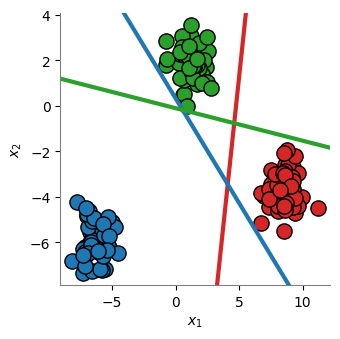

In [6]:
import numpy as np

plt.figure(figsize=(3.5, 3.5))
plot_scatter()

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xplot = np.linspace(start=xlim[0], stop=xlim[1], num=20)

fronteraA = (
    -sgdClassifier.intercept_[0] / sgdClassifier.coef_[0][1]
    - sgdClassifier.coef_[0][0] / sgdClassifier.coef_[0][1] * xplot
)

fronteraB = (
    -sgdClassifier.intercept_[1] / sgdClassifier.coef_[1][1]
    - sgdClassifier.coef_[1][0] / sgdClassifier.coef_[1][1] * xplot
)

fronteraC = (
    -sgdClassifier.intercept_[2] / sgdClassifier.coef_[2][1]
    - sgdClassifier.coef_[2][0] / sgdClassifier.coef_[2][1] * xplot
)


plt.plot(xplot, fronteraA, color="tab:red", linewidth=3)
plt.plot(xplot, fronteraB, color="tab:blue", linewidth=3)
plt.plot(xplot, fronteraC, color="tab:green", linewidth=3)

plt.xlim(xlim)
plt.ylim(ylim)

plt.show()